HR ANALYTICS
GROUP-2
MLP-1
BDA-01 
SECTION G
ANUSHKA GOEL -015003
POSHALI WADHAWAN - 015008
PRAKHAR SINGH -015010
SUMIT GUPTA - 015022
KHAYATI CHADHA- 015033

#Step1: Importing libraries like Numpy, Pandas, Matplotlib, seaborne and scikit learn (slearn)

#Numpy: Numpy is a general-purpose array processing package. It provides a high performance multidimentional array object. It is the fundamental package for scientific computing with Python. Numerical Analysis Library

#Pandas: Pandas is used for data analytics and for reading of dataset which is in .csv format and data processing. Pandas is also used for data manipulation and for manipulating numerical data.
# New Section
#Matpotlib: For charts or plots

#Seaborn: for charts or plots built on top of matplotlib, it is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#Sklearn: Scikit-learn library provides many unsupervised and supervised learning algorithms. The scikit-learn provides regression, classification and Model selection Preprocessing.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot  import imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep data_Capital One.csv to HR_comma_sep data_Capital One.csv


In [3]:
hr = pd.read_csv("HR_comma_sep data_Capital One.csv")

In [4]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,0,low,1
1,0.80,0.86,5,262,6,0,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,0,low,1
4,0.37,0.52,2,159,3,0,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,3,low,1
14995,0.37,0.48,2,160,3,0,0,3,low,1
14996,0.37,0.53,2,143,3,0,0,3,low,1
14997,0.11,0.96,6,280,4,0,0,3,low,1


In [5]:
#Get to know data:
hr.shape             

(14999, 10)

In [6]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'left'],
      dtype='object')

Step 3: Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data

Exploration is a step in the Data Analysis Process, where a number of techniques are used to better understand he dataset being used.

In this step, we will perform the below operations:

3.1) Understanding Your Variables

3.1.1 Head the dataset

3.1.2) The shape of the dataset

3.1.3) List types of all columns

3.1.4) Info of the dataset

3.1.5) Summary of the dataset

3.2) Data Cleaning

3.2.1) Check the DUPLICATES

3.2.2) Check the NULL values

In [7]:

hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                      int64
salary                    object
left                       int64
dtype: object

In [8]:
hr.dtypes.value_counts() 

int64      7
float64    2
object     1
dtype: int64

In [9]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

In [10]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.163344,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.923022,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,5.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,1.000000


Negative (0):  11428
Positive  (1):  3571


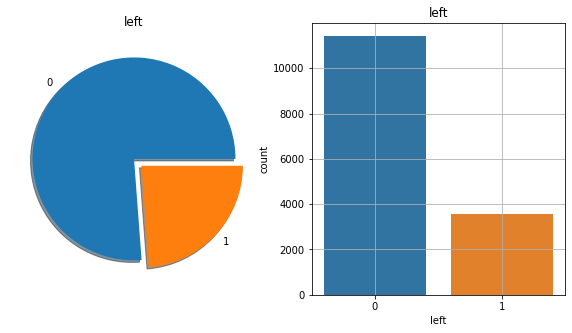

In [11]:
#Count plot
#Outcome count plot
f,ax=plt.subplots(1,2, figsize = (10,5))
hr['left'].value_counts().plot.pie(explode = [0,0.1], ax= ax[0], shadow = True)
ax[0].set_title('left')
ax[0].set_ylabel('')
sns.countplot('left', data=hr, ax=ax[1])
ax[1].set_title('left')
N,P = hr['left'].value_counts()
print('Negative (0): ', N )
print('Positive  (1): ', P )
plt.grid()
plt.show()

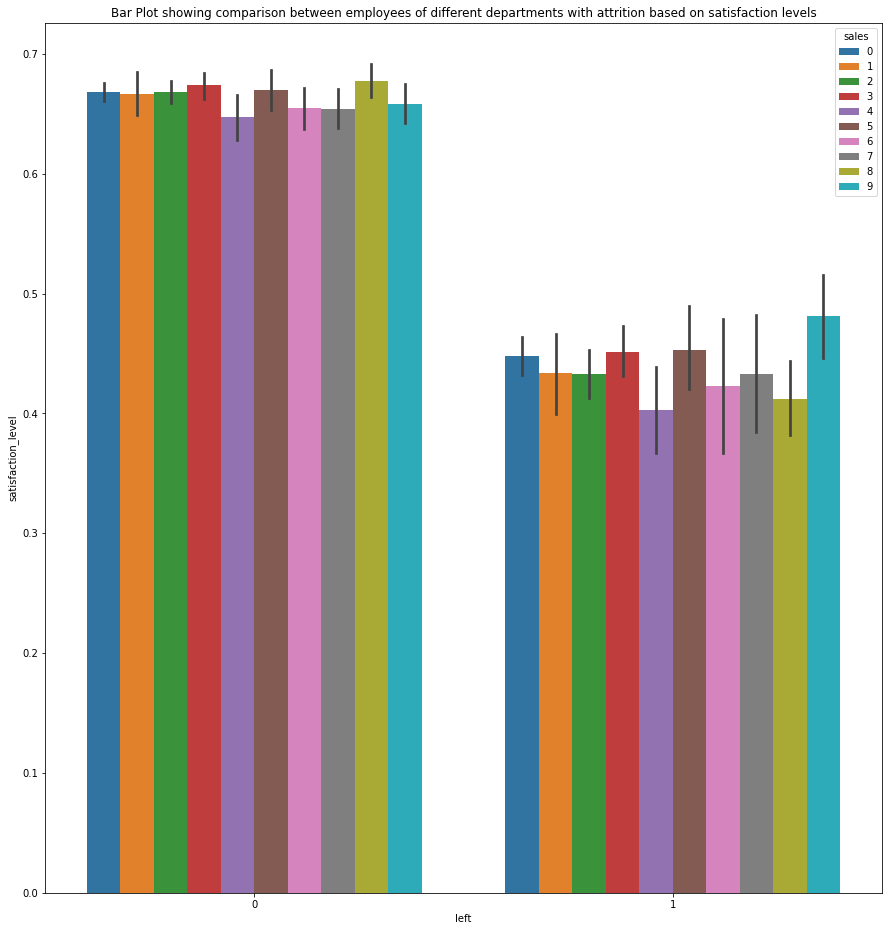

In [12]:
plt.figure(figsize = (15,16))
ax = sns.barplot(x="left", y="satisfaction_level", hue="sales", data=hr)
ax.set_title("Bar Plot showing comparison between employees of different departments with attrition based on satisfaction levels")
plt.show()

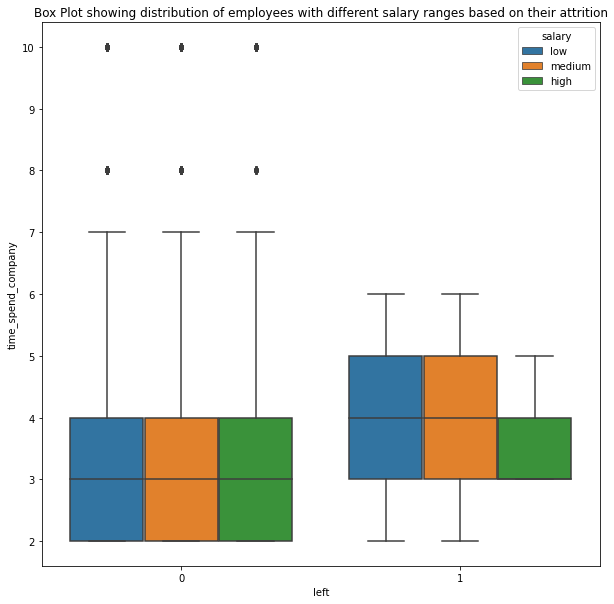

In [13]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x="left", y="time_spend_company", hue="salary",data=hr)
ax.set_title("Box Plot showing distribution of employees with different salary ranges based on their attrition")
plt.show()

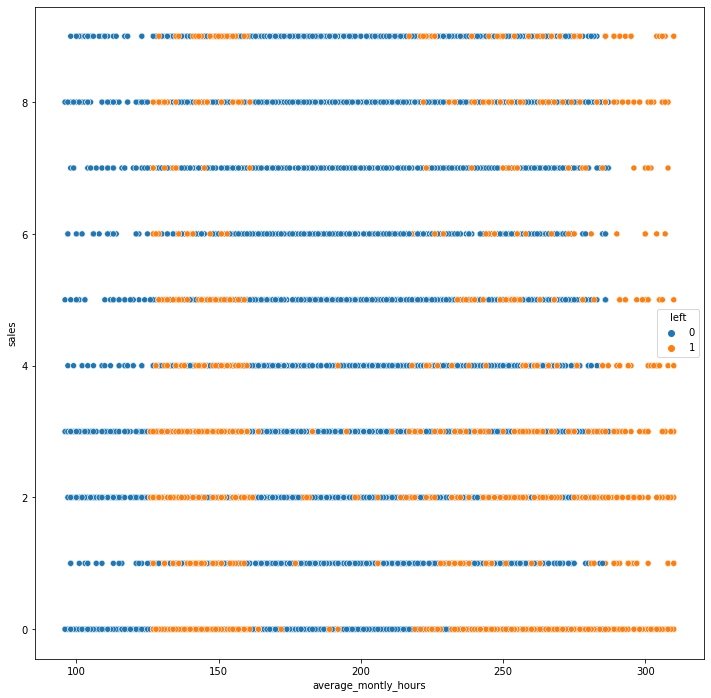

In [14]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=hr, x="average_montly_hours", y="sales", hue="left")
plt.show()

In [15]:
tab=pd.crosstab(hr["salary"],hr["time_spend_company"])
tab


time_spend_company,2,3,4,5,6,7,8,10
salary,,,,,,,,
high,303,520,173,66,55,38,18,64
low,1527,3205,1300,799,333,36,60,56
medium,1414,2718,1084,608,330,114,84,94


<function matplotlib.pyplot.show>

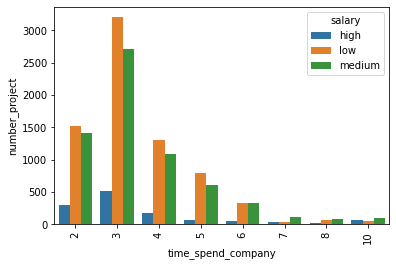

In [16]:
stacked = tab.stack().reset_index().rename(columns={0:'number_project'})
sns.barplot(x=stacked.time_spend_company, y=stacked.number_project, hue=stacked.salary)
plt.xticks(rotation=90)
plt.show

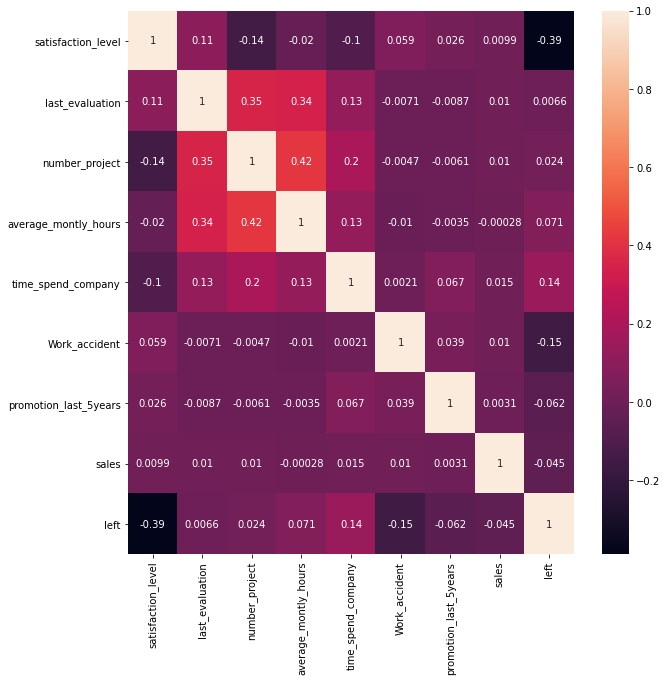

In [17]:
#Analysing relationship btw variables
#get correlation of each feature in dataset
corrmat = hr.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
#plot heat map
g= sns.heatmap(hr[top_corr_features].corr(),annot=True)

In [18]:
hr = hr.sample(frac = 1)
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
13123,0.52,0.57,3,270,3,0,0,7,low,0
3264,0.59,0.79,4,209,2,0,0,2,medium,0
9845,0.69,0.94,5,259,2,0,0,8,medium,0
10799,0.78,0.59,5,236,3,0,0,2,high,0
2732,0.56,0.68,5,203,2,0,0,8,low,0


In [19]:
hr.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
sales                     10
salary                     3
left                       2
dtype: int64

In [20]:
hr.nunique() < 5

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident             True
promotion_last_5years     True
sales                    False
salary                    True
left                      True
dtype: bool

In [21]:
def sep_Cat_Num_columns(dx):
    cat = dx.nunique() < 5
    categorical_columns = dx.loc[: , cat].columns
    numerical_columns = set(dx.columns).difference(set(categorical_columns))
    return list(categorical_columns),list(numerical_columns)

In [22]:
categorical_columns,numerical_columns = sep_Cat_Num_columns(hr)

In [23]:
categorical_columns, numerical_columns

(['Work_accident', 'promotion_last_5years', 'salary', 'left'],
 ['number_project',
  'sales',
  'last_evaluation',
  'time_spend_company',
  'average_montly_hours',
  'satisfaction_level'])

In [24]:
onehot = ohe(sparse = False)              

In [25]:
onehot.fit(hr[['Work_accident', 'promotion_last_5years', 'salary', 'left']])          
t = onehot.transform(hr[['Work_accident', 'promotion_last_5years', 'salary', 'left']])  
t

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [26]:
scaleit = ss()

In [27]:
scaleit.fit(hr[['satisfaction_level','sales', 'last_evaluation', 'time_spend_company', 'number_project', 'average_montly_hours']])
scaleit.transform(hr[['satisfaction_level','sales', 'last_evaluation', 'time_spend_company', 'number_project', 'average_montly_hours']])

array([[-0.69516483,  1.99685451, -0.85358047, -0.34123516, -1.46286291,
        -1.20241514],
       [-0.25272675,  1.99685451,  1.42494396, -0.34123516, -0.65153764,
        -0.14117209],
       [ 0.43104118,  0.97048534, -0.26934344, -1.0261256 ,  0.97111292,
         0.17920317],
       ...,
       [ 0.31037625,  1.65473145,  1.30809656, -1.0261256 ,  0.97111292,
         1.1603524 ],
       [ 0.67237104, -0.39800688, -0.73673307, -0.34123516,  0.97111292,
         0.69981296],
       [-0.21250511,  1.65473145, -0.21091974, -1.0261256 ,  0.97111292,
         0.03903899]])

In [28]:
def transform(categorical_columns,numerical_columns,hr):
    cat = ('categorical', ohe() , categorical_columns  )
    num = ('numeric', ss(), numerical_columns)
    col_trans = ct([cat, num])
    col_trans.fit(hr)
    hr_transAndScaled = col_trans.transform(hr)
    return hr_transAndScaled, col_trans

In [29]:
hr_transAndScaled, _  = transform(categorical_columns, numerical_columns, hr)

In [30]:
X=hr.iloc[:,0:9]
y=hr.iloc[:, 9]

In [31]:
X_train,X_test, y_train, y_test = train_test_split(hr_transAndScaled,y , test_size = 0.25 )

In [32]:
X_train.shape   

(11249, 15)

In [33]:


X_test.shape        

(3750, 15)

In [34]:
y_train.shape   

(11249,)

In [35]:
y_test.shape 

(3750,)

In [36]:
clf = dt()           
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:



out = clf.predict(X_test)
out

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
np.sum(out == y_test)/y_test.values.size*100

100.0

In [39]:
d=clf.predict(X_test)
pred_hr=pd.DataFrame(d)
pred_hr

,0
0,0
1,1
2,0
3,0
4,1
...,...
3745,0
3746,0
3747,0
3748,0


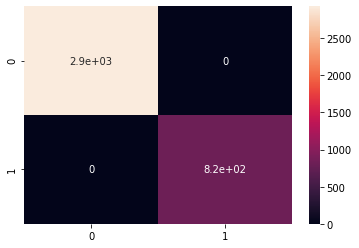

In [40]:
#confusion matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, pred_hr)
cm
sns.heatmap(confusion_matrix(y_test,pred_hr),annot = True)

In [41]:
#making the confusion matrix of dt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, pred_hr)
print('TN – True Negative {}'.format(cm[0,0]))
print('FP – False Positive {}'.format(cm[0,1]))
print('FN – False Negative {}'.format(cm[1,0]))
print('TP – True Positive {}'.format(cm[1,1]))
#print('Accuracy Rate: {}'.format (np.divide(np.sum([cm[0,0], cm[1,1]]),np.sum(cm)))
#print('Misclassification Rate: {}'.format (np.divide(np.sum([cm[0,1], cm[1,0]]),np.sum(cm))))

TN – True Negative 2928
FP – False Positive 0
FN – False Negative 0
TP – True Positive 822


In [42]:
print('Classification Report of Decision Tree : \n', classification_report(y_test, pred_hr, digits = 4))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2928
           1     1.0000    1.0000    1.0000       822

    accuracy                         1.0000      3750
   macro avg     1.0000    1.0000    1.0000      3750
weighted avg     1.0000    1.0000    1.0000      3750



In [43]:
auc = round(roc_auc_score(y_test, pred_hr)*100,2)
print('roc_auc_score of DT :' , auc)

roc_auc_score of DT : 100.0


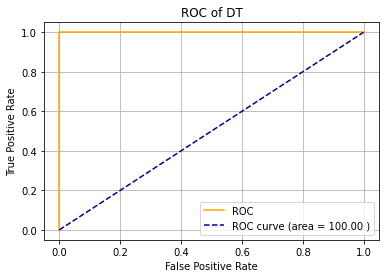

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, pred_hr)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color='darkblue' , linestyle='--' , label = 'ROC curve (area = %0.2f )' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of DT')
plt.legend()
plt.grid()
plt.show()